In [43]:
# Pandas allows data cleaning and similar to R Dataframes
import pandas as pd
import numpy as np
from numpy import random as rn

In [4]:
# Series: like NumPy array but contains access labels
    # Series stores data like a hash table (fast lookup)
labels  = [ 'a', 'b', 'c' ]
my_data = [ 10, 20, 30 ]
arr     = np.array( my_data )
d       = { 'a' : 10, 'b' : 20, 'c' : 30 }

In [5]:
# Creates a table with indexes
pd.Series( data = my_data )

0    10
1    20
2    30
dtype: int64

In [6]:
# Labeled Indexed Series
pd.Series( data = my_data, index = labels )

a    10
b    20
c    30
dtype: int64

In [7]:
# Pass in NumPy Arrays as well
pd.Series( arr )

0    10
1    20
2    30
dtype: int32

In [8]:
# Pass in Dict: will have preset labels
pd.Series( d )

a    10
b    20
c    30
dtype: int64

In [10]:
ser_one = pd.Series( [1, 2, 3, 4], ['USA', 'Germany', 'USSR', 'Japan'] )
ser_two = pd.Series( [1, 2, 5, 4], ['USA', 'Germany', 'Italy', 'Japan'] )

In [11]:
print( ser_one['USA'] )

1


In [12]:
# Operations in Series is Based off Index
    # Integers are Converted into Floats
print( ser_one + ser_two )

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64


In [16]:
# DataFrames
rn.seed(101)

In [17]:
# Params: values, rownames, colnames
df = pd.DataFrame( rn.randn( 5, 4 ), 
                  [ 'A', 'B', 'C', 'D', 'E' ], 
                  [ 'W', 'X', 'Y', 'Z'] )

In [19]:
# Each column is a Pandas Series
    # DataFrame is just a set of Series that share an index
print( df )
df

          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [26]:
df[ [ 'W', 'Z' ] ]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [36]:
# New Column
df['New'] = df['W'] + df['Y']

In [38]:
df

,W,X,Y,Z,New
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [39]:
# Drop Column
    # axis = 0: rows
    # axis = 1: columns
    # inplace = True: update column to drop rather than show a view of dropped column
df.drop( 'New', axis = 1, inplace = True )

# Careful for dropping column when it has been dropped

In [40]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [42]:
df.drop( 'E', axis = 0, inplace = True )
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [43]:
# Get Dimension of DataFrame
df.shape

(4, 4)

In [46]:
# Selecting Rows
    # Returns a Series because rows are a Series as well
    # loc() is by label
    # iloc() is by index
print( df.loc[ 'A' ] )
print( df.iloc[1] )

W    0.651118
X   -0.319318
Y   -0.848077
Z    0.605965
Name: B, dtype: float64

In [48]:
# Subsetting
df.loc[ ['A', 'B'], ['W', 'Y'] ]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


In [50]:
# Conditional Selection
bool_df = df > 0
bool_df

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True


In [51]:
df[ bool_df ]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057


In [52]:
df[ df > 0 ]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057


In [55]:
# Filter out the rows that do not match
df[ df[ 'W' ] > 0 ]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057


In [56]:
result_df = df[ df[ 'W' ] > 0 ]

In [57]:
result_df[ 'X' ]

A    0.628133
B   -0.319318
D   -0.758872
Name: X, dtype: float64

In [59]:
# Shorthand
df[ df[ 'W' ] > 0 ][ ['Y', 'X'] ]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872


In [60]:
# Further Subsetting using Bool Series
bool_ser = df['W'] > 0
result   = df[ bool_ser ]
result

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057


In [61]:
# Even further subsetting
my_cols = ['Y', 'X']
result[my_cols]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872


In [ ]:
# It is best to use one-line commands as it saves memory

In [69]:
# Multiple Conditions
    # Cannot use and becuase the return is a Series of boolean values
    # and gets confused as to which boolean to abide by
    # Use an &
df[ (df['W'] > 0) & (df['Y'] > 0.9) ]

,W,X,Y,Z
A,2.70685,0.628133,0.907969,0.503826


In [79]:
df[ (df['W'] > 0) | (df['Y'] > 0.9) ]

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
OR,0.188695,-0.758872,-0.933237,0.955057


In [70]:
# Indexing
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [71]:
# Reset Index
    # Original Index becomes a new column
    # inplace to set it permanently
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057


In [75]:
# Trick: split() to create a value array that can be used 
# as cell values, ronames, or colnames
new_ind = 'CA NY WY OR'.split()
df['States'] = new_ind
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR


In [77]:
# Set column to be new index
df.set_index('States', inplace = True)
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057


In [84]:
#Multi-Index
    # zip() creates tuple pairs from individual lists
    # MultiIndex gets unique values in each list
    # and generates a multi-level indexing from those values
outside    = ['G1', 'G1', 'G1', 'G2', 'G2', 'G2']
inside     = [1, 2, 3, 1, 2, 3]
hier_index = list( zip( outside, inside ) )
hier_index = pd.MultiIndex.from_tuples( hier_index )

In [87]:
df = pd.DataFrame( rn.randn(6, 2), hier_index, ['A', 'B'] )
df

A         B
G1 1 -0.497104 -0.754070
   2 -0.943406  0.484752
   3 -0.116773  1.901755
G2 1  0.238127  1.996652
   2 -0.993263  0.196800
   3 -1.136645  0.000366

In [90]:
# Indexing
df.loc[ 'G1' ].loc[1]

A   -0.497104
B   -0.754070
Name: 1, dtype: float64

In [93]:
# Naming Index
df.index.names = ['Groups', 'Numbers']
df

A         B
Groups Numbers                    
G1     1       -0.497104 -0.754070
       2       -0.943406  0.484752
       3       -0.116773  1.901755
G2     1        0.238127  1.996652
       2       -0.993263  0.196800
       3       -1.136645  0.000366

In [97]:
# Cross Section: has ability to go inside a multi-level index
    # Grab specific rows from each subgroup
df.xs( 1, level = 'Numbers' )

,A,B
Groups,,
G1,-0.497104,-0.754070
G2,0.238127,1.996652


In [99]:
# Missing Data
d = { 'A' : [1, 2, np.nan], 'B' : [5, np.nan, np.nan], 'C' : [1, 2, 3] }
df = pd.DataFrame( d )
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [106]:
# Drop NA values from DataFrame
    # axis: specifies rows or columns
    # thresh: number of NA values present before column is dropped
df.dropna(axis = 1, thresh = 2)

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [108]:
# Fill NA values (with mean of column for example)
df.fillna( value = df.mean() )

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,1.5,5.0,3


In [114]:
# Group By: group rows based off column and perform aggregate function
data = { 'Company' : [ 'GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB' ],
         'Person'  : [ 'Vanessa', 'Rachel', 'Riyun', 'Yuelan', 'Zaim', 'Meira' ],
         'Sales'   : [ 200, 120, 340, 124, 243, 350 ] }

In [115]:
df = pd.DataFrame( data )
df

,Company,Person,Sales
0,GOOG,Vanessa,200
1,GOOG,Rachel,120
2,MSFT,Riyun,340
3,MSFT,Yuelan,124
4,FB,Zaim,243
5,FB,Meira,350


In [118]:
# Save DataFrame as a groupby object and then perform aggregate function mean
by_company = df.groupby( 'Company' )
by_company.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [119]:
# Better to call all in one line for memory saving reasons
by_company.mean().loc[ 'FB' ]

Sales    296.5
Name: FB, dtype: float64

In [120]:
# Get overall states of the data
df.groupby( 'Company' ).describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [124]:
df_one = pd.DataFrame( { 'A' : [ 'A1', 'A2', 'A3', 'A4' ],
                         'B' : [ 'B1', 'B2', 'B3', 'B4' ],
                         'C' : [ 'C1', 'C2', 'C3', 'C4' ],
                         'D' : [ 'D1', 'D2', 'D3', 'D4' ] } )

df_two = pd.DataFrame( { 'A' : [ 'A5', 'A6', 'A7', 'A8' ],
                         'B' : [ 'B5', 'B6', 'B7', 'B8' ],
                         'C' : [ 'C5', 'C6', 'C7', 'C8' ],
                         'D' : [ 'D5', 'D6', 'D7', 'D8' ] } )

df_thr = pd.DataFrame( { 'A' : [ 'A9', 'A10', 'A11', 'A12' ],
                         'B' : [ 'B9', 'B10', 'B11', 'B12' ],
                         'C' : [ 'C9', 'C10', 'C11', 'C12' ],
                         'D' : [ 'D9', 'D10', 'D11', 'D12' ] } )

In [125]:
# Concatenation: binds together
    # axis: determine concat by columns or by rows
pd.concat( [ df_one, df_two, df_thr ] )

,A,B,C,D
0,A1,B1,C1,D1
1,A2,B2,C2,D2
2,A3,B3,C3,D3
3,A4,B4,C4,D4
0,A5,B5,C5,D5
1,A6,B6,C6,D6
2,A7,B7,C7,D7
3,A8,B8,C8,D8
0,A9,B9,C9,D9
1,A10,B10,C10,D10


In [126]:
pd.concat( [ df_one, df_two, df_thr ], axis = 1 )

,A,B,C,D,A,B,C,D,A,B,C,D
0,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
1,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
2,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11
3,A4,B4,C4,D4,A8,B8,C8,D8,A12,B12,C12,D12


In [137]:
# Merge: merge two dataframes by a common key
left = pd.DataFrame( { 'Key' : [ 'K0', 'K1', 'K2' ],
                       'B'   : [ 'B0', 'B1', 'B2' ],
                       'C'   : [ 'C0', 'C1', 'C2' ] } )

right = pd.DataFrame( { 'Key' : [ 'K0', 'K1', 'K2' ],
                        'E'   : [ 'E0', 'E1', 'E2' ],
                        'F'   : [ 'F0', 'F1', 'F2' ] } )

pd.merge( left, right, how = 'inner', on = 'Key' )

,Key,B,C,E,F
0,K0,B0,C0,E0,F0
1,K1,B1,C1,E1,F1
2,K2,B2,C2,E2,F2


In [135]:
# Join: combines two different dataframes into a single result DataFrame
left = pd.DataFrame( { 'A' : [ 'A0', 'A1', 'A2' ],
                       'B' : [ 'B0', 'B1', 'B2' ],
                       'C' : [ 'C0', 'C1', 'C2' ] } )

right = pd.DataFrame( { 'D' : [ 'D0', 'D1', 'D2' ],
                        'E' : [ 'E0', 'E1', 'E2' ],
                        'F' : [ 'F0', 'F1', 'F2' ] } )

left.join( right )

,A,B,C,D,E,F
0,A0,B0,C0,D0,E0,F0
1,A1,B1,C1,D1,E1,F1
2,A2,B2,C2,D2,E2,F2


In [1]:
 # Built-In Data Visualization

In [18]:
import pandas as pd
import seaborn as sns

In [19]:
sns.set_style( 'darkgrid' )

In [5]:
%matplotlib inline

In [32]:
df1 = pd.read_csv( '../Data/df1', index_col = 0 )
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [15]:
df2 = pd.read_csv( '../Data/df2' )
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


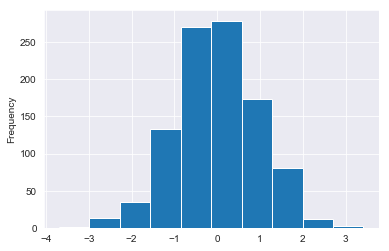

In [25]:
df1[ 'A' ].plot.hist()

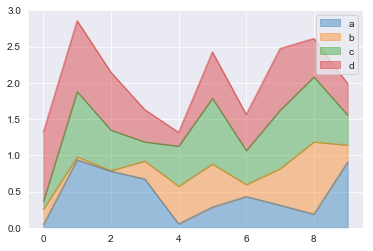

In [27]:
df2.plot.area( alpha = 0.4 )

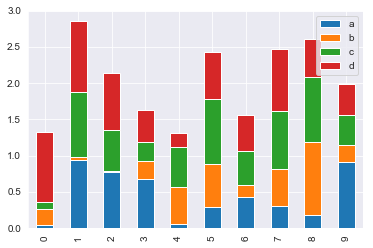

In [29]:
df2.plot.bar( stacked = True )

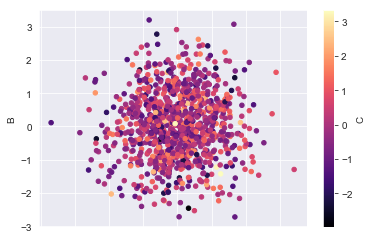

In [40]:
 df1.plot.scatter(x = 'A', 
                  y = 'B', 
                  c = 'C', 
                  cmap = 'magma', 
                  # To show points by size
                  # s = df1['C'] * 100 )

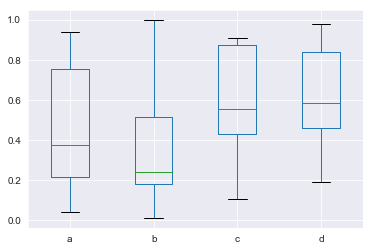

In [41]:
df2.plot.box()

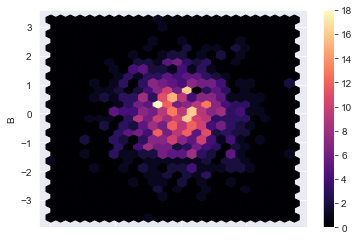

In [47]:
df = pd.DataFrame( np.random.randn( 1000, 2 ), columns = [ 'A', 'B' ] )
df.plot.hexbin( x = 'A', y = 'B', gridsize = 25, cmap = 'magma' )

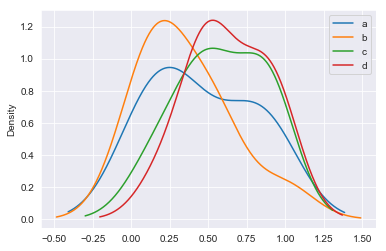

In [53]:
df2.plot.density()